In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configurar estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [7]:
# %%
# Cargar los dos datasets
print("📁 CARGANDO DATASETS")
print("="*50)

# Datos sintéticos  
synthetic_file = '/Users/davidnogueras/Desktop/Cursor/Synthetic_Data_Generator/synthetic_data_generator_basic/Sample data/Datos_de_clientes_en_retail_en_synthetic_100rows_20250617_183546.csv'  
try:
    df = pd.read_csv(synthetic_file, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(synthetic_file, encoding='latin-1')

print(f"✅ Datos sintéticos: {df_synthetic.shape[0]} filas, {df_synthetic.shape[1]} columnas")

📁 CARGANDO DATASETS
✅ Datos sintéticos: 100 filas, 12 columnas


In [8]:
# Vista inicial de los datos
print("👀 VISTA INICIAL DE LOS DATOS")
print("="*50)

print("🔝 Primeras 5 filas:")
display(df.head())

print("\n🔻 Últimas 5 filas:")
display(df.tail())

print(f"\n📋 Nombres de columnas ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

👀 VISTA INICIAL DE LOS DATOS
🔝 Primeras 5 filas:


,`id_cliente,edad,rango_edad_espanol,ingresos_anuales_euros,frecuencia_compra_telefonos,Presupuesto_Telefono_Euros,comunidad_autonoma,provincia,sexo,nivel_estudios,canal_preferido_compra,fecha_ultima_compra`
0,`1,32,Joven adulto,42000,Anual,800,Comunidad de Madrid,Madrid,Hombre,Universitarios,Online,2022-05-15`
1,`2,41,Adulto,52000,Trimestral,500,Comunidad de Madrid,Madrid,Mujer,Secundaria,Tienda física,2022-03-20`
2,`3,28,Joven adulto,38000,Mensual,1200,Comunidad de Madrid,Madrid,Hombre,Universitarios,Online,2022-04-10`
3,`4,50,Adulto mayor,45000,Anual,400,Comunidad de Madrid,Madrid,Mujer,Primaria,Centro comercial,2021-12-05`
4,`5,35,Joven adulto,48000,Trimestral,900,Comunidad de Madrid,Madrid,Hombre,Universitarios,Tienda física,2022-02-25`



🔻 Últimas 5 filas:


,`id_cliente,edad,rango_edad_espanol,ingresos_anuales_euros,frecuencia_compra_telefonos,Presupuesto_Telefono_Euros,comunidad_autonoma,provincia,sexo,nivel_estudios,canal_preferido_compra,fecha_ultima_compra`
95,`96,40,Joven adulto,44000,Mensual,1000,Comunidad de Madrid,Madrid,Mujer,Universitarios,Online,2022-05-20`
96,`97,51,Adulto,48000,Anual,600,Comunidad de Madrid,Madrid,Hombre,Primaria,Centro comercial,2021-12-10`
97,`98,43,Joven adulto,42000,Trimestral,900,Comunidad de Madrid,Madrid,Mujer,Secundaria,Tienda física,2022-03-20`
98,`99,58,Adulto,50000,Mensual,550,Comunidad de Madrid,Madrid,Hombre,Universitarios,Online,2022-04-10`
99,`100,65,Adulto mayor,45000,Anual,450,Comunidad de Madrid,Madrid,Hombre,Primaria,Centro comercial,2022-02-25`



📋 Nombres de columnas (12):
    1. `id_cliente
    2. edad
    3. rango_edad_espanol
    4. ingresos_anuales_euros
    5. frecuencia_compra_telefonos
    6. Presupuesto_Telefono_Euros
    7. comunidad_autonoma
    8. provincia
    9. sexo
   10. nivel_estudios
   11. canal_preferido_compra
   12. fecha_ultima_compra`


In [9]:
# Información general del dataset
print("📊 INFORMACIÓN GENERAL")
print("="*50)

print("🔍 Información básica:")
df.info()

print(f"\n📈 Forma del dataset: {df.shape}")
print(f"🔢 Total de celdas: {df.shape[0] * df.shape[1]:,}")

# Tipos de datos
print(f"\n📝 Tipos de datos:")
tipos = df.dtypes.value_counts()
for tipo, cantidad in tipos.items():
    print(f"   {tipo}: {cantidad} columnas")

# Identificar tipos de variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"\n🔢 Variables numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"📂 Variables categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"📅 Variables de fecha ({len(datetime_cols)}): {datetime_cols}")

📊 INFORMACIÓN GENERAL
🔍 Información básica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   `id_cliente                  100 non-null    object
 1   edad                         100 non-null    int64 
 2   rango_edad_espanol           100 non-null    object
 3   ingresos_anuales_euros       100 non-null    int64 
 4   frecuencia_compra_telefonos  100 non-null    object
 5   Presupuesto_Telefono_Euros   100 non-null    int64 
 6   comunidad_autonoma           100 non-null    object
 7   provincia                    100 non-null    object
 8   sexo                         100 non-null    object
 9   nivel_estudios               100 non-null    object
 10  canal_preferido_compra       100 non-null    object
 11  fecha_ultima_compra`         100 non-null    object
dtypes: int64(3), object(9)
memory usage: 9.5+ KB

📈 F

In [10]:
# Estadísticas descriptivas
print("📊 ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)

if len(numeric_cols) > 0:
    print("🔢 Variables numéricas:")
    display(df[numeric_cols].describe().round(3))

if len(categorical_cols) > 0:
    print("\n📂 Variables categóricas:")
    cat_summary = []
    for col in categorical_cols:
        cat_summary.append({
            'Variable': col,
            'Valores_únicos': df[col].nunique(),
            'Más_frecuente': df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A',
            'Frecuencia_max': df[col].value_counts().iloc[0] if len(df[col]) > 0 else 0,
            'Porcentaje_max': f"{df[col].value_counts(normalize=True).iloc[0]*100:.1f}%" if len(df[col]) > 0 else "0%"
        })
    display(pd.DataFrame(cat_summary))

📊 ESTADÍSTICAS DESCRIPTIVAS
🔢 Variables numéricas:


,edad,ingresos_anuales_euros,Presupuesto_Telefono_Euros
count,100.000,100.000,100.000
mean,43.300,44710.000,718.000
std,9.643,3709.924,214.325
min,25.000,36000.000,400.000
25%,36.000,42000.000,537.500
50%,42.500,45000.000,750.000
75%,50.000,48000.000,900.000
max,65.000,52000.000,1200.000



📂 Variables categóricas:


,Variable,Valores_únicos,Más_frecuente,Frecuencia_max,Porcentaje_max
0,`id_cliente,100,`1,1,1.0%
1,rango_edad_espanol,3,Joven adulto,51,51.0%
2,frecuencia_compra_telefonos,3,Anual,34,34.0%
3,comunidad_autonoma,1,Comunidad de Madrid,100,100.0%
4,provincia,1,Madrid,100,100.0%
5,sexo,2,Hombre,51,51.0%
6,nivel_estudios,3,Universitarios,49,49.0%
7,canal_preferido_compra,3,Online,34,34.0%
8,fecha_ultima_compra`,25,2022-01-10`,7,7.0%


📈 DISTRIBUCIONES DE VARIABLES NUMÉRICAS


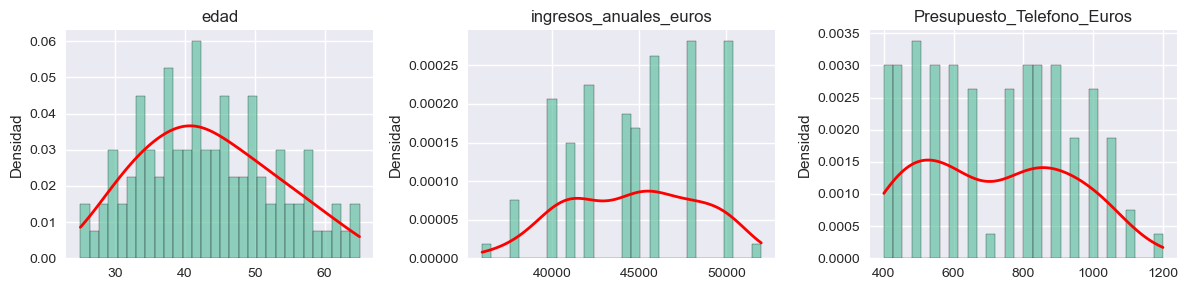

In [11]:
# Distribuciones de variables numéricas
if len(numeric_cols) > 0:
    print("📈 DISTRIBUCIONES DE VARIABLES NUMÉRICAS")
    print("="*50)
    
    # Histogramas
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            # Histograma con curva de densidad
            axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, density=True, edgecolor='black')
            
            # Añadir curva de densidad
            try:
                data_clean = df[col].dropna()
                if len(data_clean) > 1:
                    x = np.linspace(data_clean.min(), data_clean.max(), 100)
                    kde = stats.gaussian_kde(data_clean)
                    axes[i].plot(x, kde(x), 'r-', linewidth=2)
            except:
                pass
            
            axes[i].set_title(f'{col}')
            axes[i].set_ylabel('Densidad')
    
    # Ocultar axes vacíos
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

📦 BOX PLOTS Y OUTLIERS


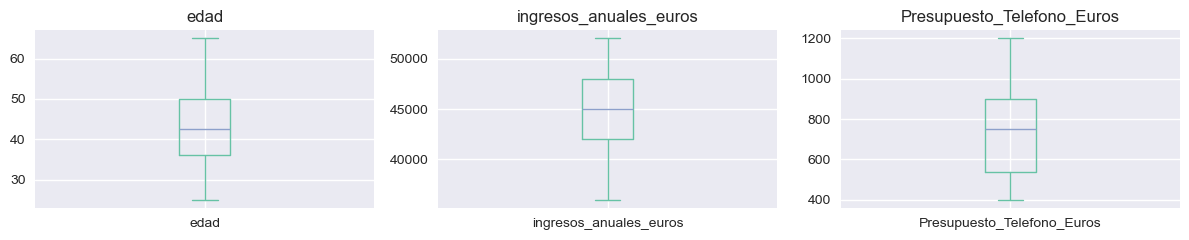

🎯 Resumen de outliers:


,Variable,Outliers,Porcentaje,Límite_inferior,Límite_superior
0,edad,0,0.0%,15.00,71.00
1,ingresos_anuales_euros,0,0.0%,33000.00,57000.00
2,Presupuesto_Telefono_Euros,0,0.0%,-6.25,1443.75


In [12]:
# Box plots y detección de outliers
if len(numeric_cols) > 0:
    print("📦 BOX PLOTS Y OUTLIERS")
    print("="*50)
    
    # Box plots
    n_cols = min(4, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 2.5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    outliers_info = []
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            # Box plot
            df[col].plot(kind='box', ax=axes[i])
            axes[i].set_title(f'{col}')
            
            # Calcular outliers
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_info.append({
                'Variable': col,
                'Outliers': len(outliers),
                'Porcentaje': f"{(len(outliers) / len(df)) * 100:.1f}%",
                'Límite_inferior': f"{lower_bound:.2f}",
                'Límite_superior': f"{upper_bound:.2f}"
            })
    
    # Ocultar axes vacíos
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Tabla de outliers
    print("🎯 Resumen de outliers:")
    display(pd.DataFrame(outliers_info))

🔗 MATRIZ DE CORRELACIONES


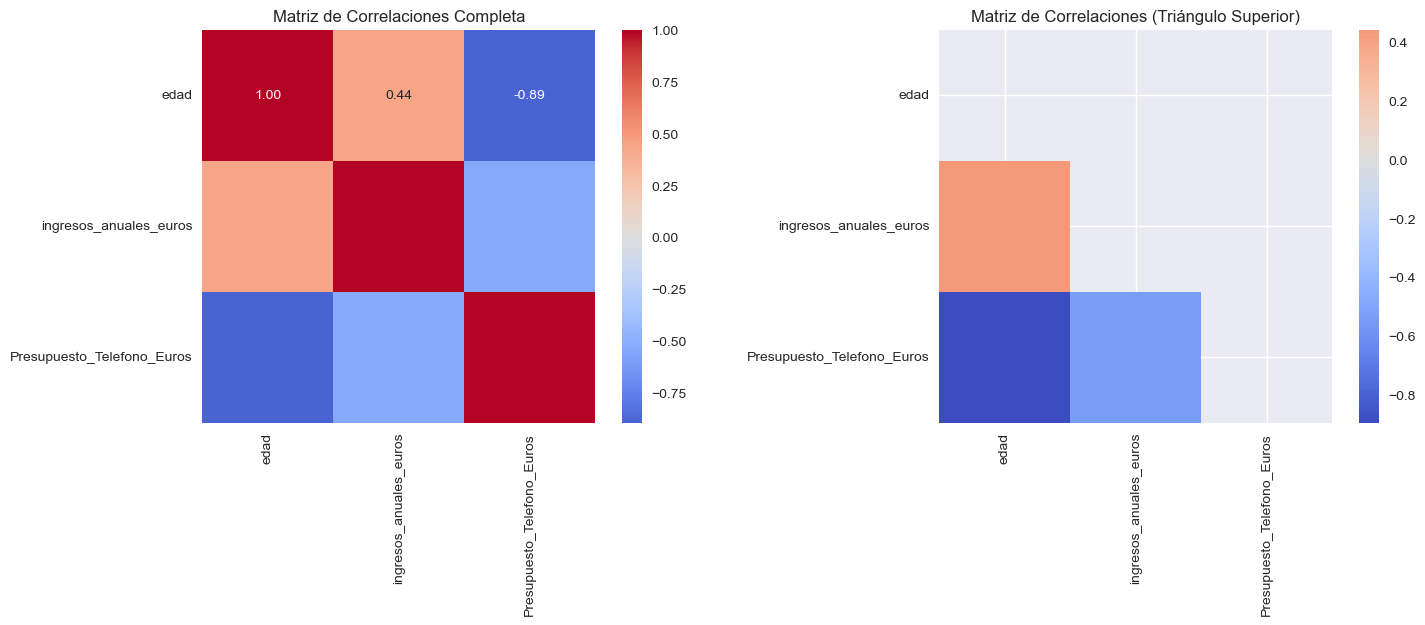


🔝 Top 10 correlaciones más fuertes:


,Variable_1,Variable_2,Correlación
1,edad,Presupuesto_Telefono_Euros,-0.892430
2,ingresos_anuales_euros,Presupuesto_Telefono_Euros,-0.537082
0,edad,ingresos_anuales_euros,0.439552


In [13]:
# Matriz de correlaciones
if len(numeric_cols) > 1:
    print("🔗 MATRIZ DE CORRELACIONES")
    print("="*50)
    
    # Calcular correlaciones
    corr_matrix = df[numeric_cols].corr()
    
    # Crear figura con subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Heatmap completo
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=ax1, fmt='.2f')
    ax1.set_title('Matriz de Correlaciones Completa')
    
    # Heatmap solo triángulo superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
                center=0, square=True, ax=ax2, fmt='.2f')
    ax2.set_title('Matriz de Correlaciones (Triángulo Superior)')
    
    plt.tight_layout()
    plt.show()
    
    # Correlaciones más fuertes
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append({
                'Variable_1': corr_matrix.columns[i],
                'Variable_2': corr_matrix.columns[j],
                'Correlación': corr_matrix.iloc[i, j],
                'Correlación_abs': abs(corr_matrix.iloc[i, j])
            })
    
    corr_df = pd.DataFrame(corr_pairs).sort_values('Correlación_abs', ascending=False)
    print("\n🔝 Top 10 correlaciones más fuertes:")
    display(corr_df[['Variable_1', 'Variable_2', 'Correlación']].head(10))

📂 ANÁLISIS DE VARIABLES CATEGÓRICAS

📋 Variable: `id_cliente
   Valores únicos: 100
   Valor más frecuente: `1 (1 veces)
   ⚠️ Demasiados valores únicos (100) para visualizar

📋 Variable: rango_edad_espanol
   Valores únicos: 3
   Valor más frecuente: Joven adulto (51 veces)


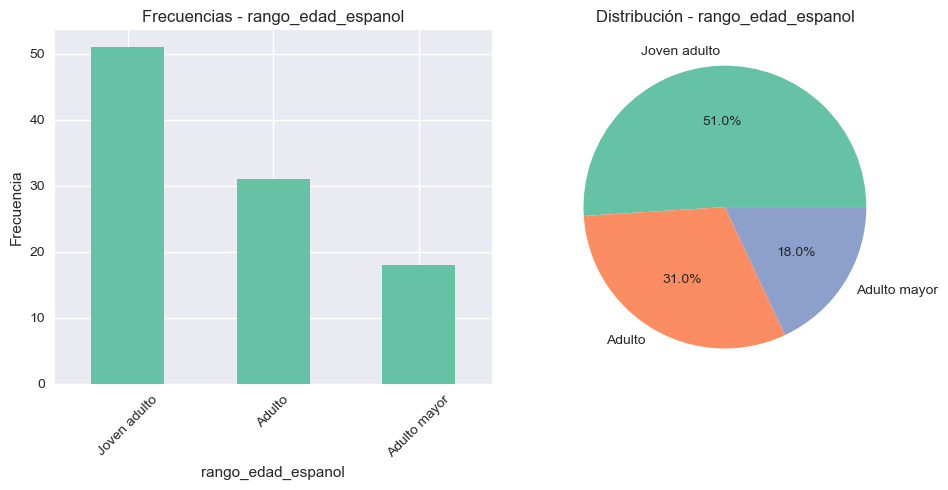


📋 Variable: frecuencia_compra_telefonos
   Valores únicos: 3
   Valor más frecuente: Anual (34 veces)


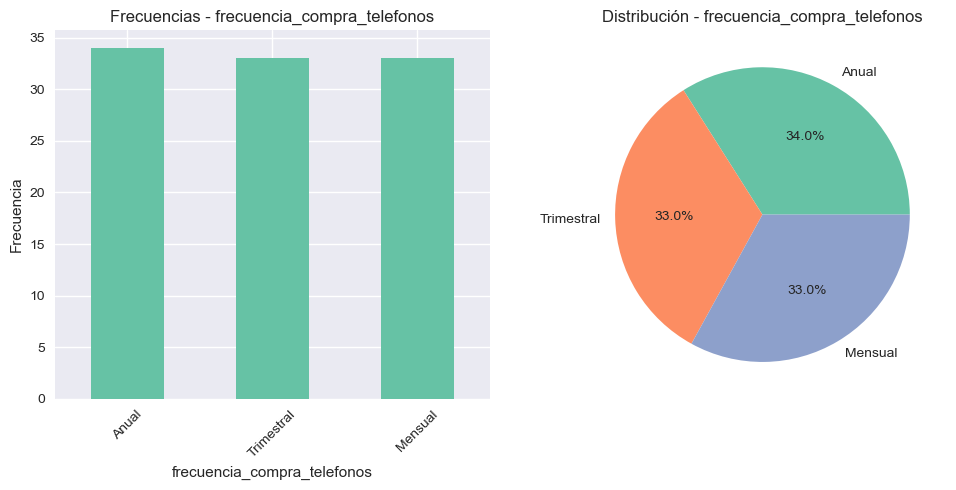


📋 Variable: comunidad_autonoma
   Valores únicos: 1
   Valor más frecuente: Comunidad de Madrid (100 veces)


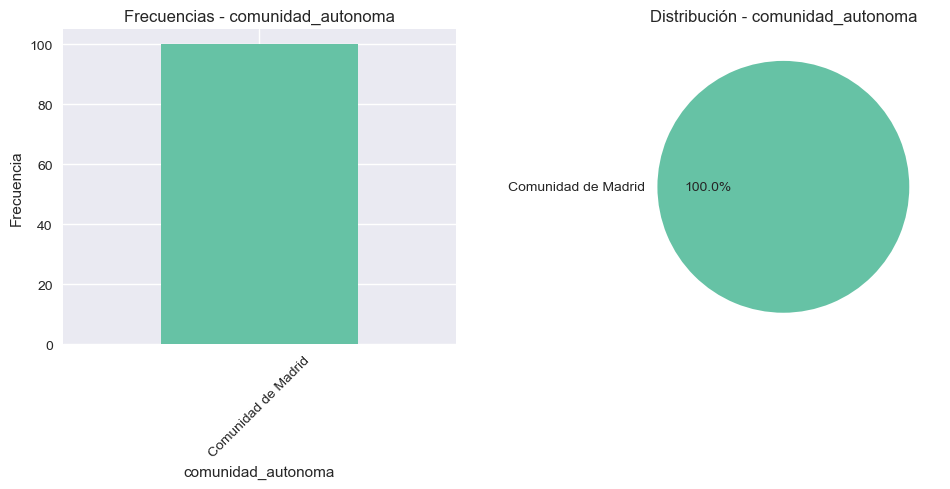


📋 Variable: provincia
   Valores únicos: 1
   Valor más frecuente: Madrid (100 veces)


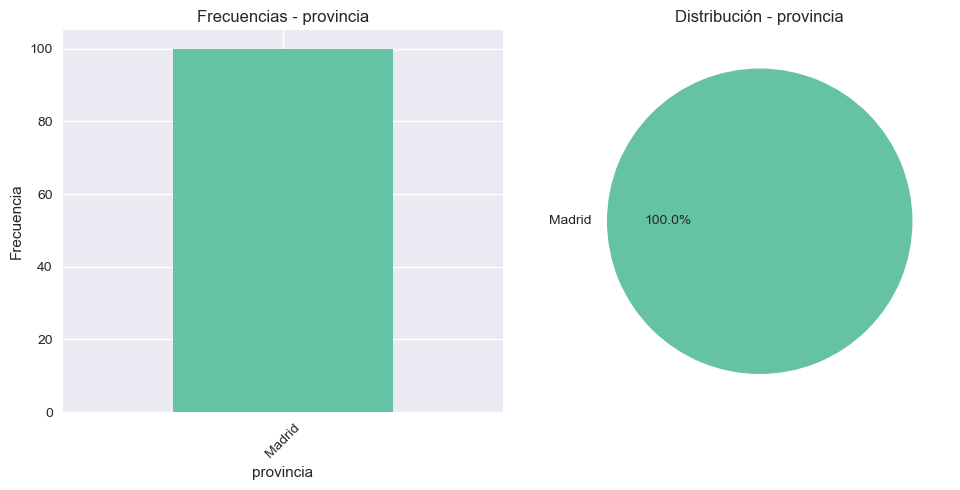

In [14]:
# Análisis de variables categóricas
if len(categorical_cols) > 0:
    print("📂 ANÁLISIS DE VARIABLES CATEGÓRICAS")
    print("="*50)
    
    for i, col in enumerate(categorical_cols[:5]):  # Máximo 5 variables
        print(f"\n📋 Variable: {col}")
        
        value_counts = df[col].value_counts()
        print(f"   Valores únicos: {df[col].nunique()}")
        print(f"   Valor más frecuente: {value_counts.index[0]} ({value_counts.iloc[0]} veces)")
        
        # Solo mostrar gráfico si no hay demasiados valores únicos
        if df[col].nunique() <= 20:
            plt.figure(figsize=(10, 5))
            
            # Gráfico de barras
            plt.subplot(1, 2, 1)
            value_counts.plot(kind='bar')
            plt.title(f'Frecuencias - {col}')
            plt.xticks(rotation=45)
            plt.ylabel('Frecuencia')
            
            # Gráfico de pastel (solo si no hay demasiados valores)
            if df[col].nunique() <= 8:
                plt.subplot(1, 2, 2)
                plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
                plt.title(f'Distribución - {col}')
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"   ⚠️ Demasiados valores únicos ({df[col].nunique()}) para visualizar")
